In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

def plot_per_class_metric(data: pd.DataFrame, metric_name: str, title: str) -> None:
    """
    Plot a bar plot for a given metric for each class.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the metrics data.
    metric_name (str): The name of the metric to plot.
    title (str): The title of the plot.
    """
    sns.barplot(
        data=data, x=data.index.to_list(), y=metric_name, hue=data.index.to_list()
    )
    plt.title(title)


def plot_confusion_matrix(data: pd.DataFrame, plot_title: str) -> None:
    """
    Plot a confusion matrix.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the confusion matrix data.
    plot_title (str): The title of the plot.
    """
    plt.figure(figsize=(10, 7))
    sns.heatmap(data, annot=True, fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(plot_title)

def get_general_metrics(algorithms_metrics: List[pd.DataFrame]) -> pd.DataFrame:
    """
    Creates a panda dataframe that contains a table with the information of each metric for each algorithm.
    Columns are the metrics and rows are the algorithms.
    
    Args:
        algorithms_metrics (List[pd.DataFrame]): A list of data frames containing the metrics for an algorithm.

    Returns:
        pd.Dataframe: The table with the information of each metric for each algorithm.
    """
    for index, algorithm_metrics in enumerate(algorithms_metrics):
        algorithms_metrics[index] = algorithm_metrics.set_index('Metric').T
        # Remove the "Metric" column name
        algorithms_metrics[index].columns.name = None

        
    return pd.concat(algorithms_metrics).T
   
def plot_general_metrics(general_metrics: pd.DataFrame):
    """
    Creates a line plot, where each line is a metric, the y axis is the value and the xaxis is the algorithm.
    
    Args:
        general_metrics (pd.DataFrame): General metrics table.
    """
    plt.figure(figsize=(8, 4))
    general_metrics.T.plot(kind='line', marker='o')
    plt.xlabel('Algorithm')
    plt.ylabel('Metric Value')
    plt.title('Averaged Metrics')
    plt.show()

# 1. ConvNext With Filter

### 1.1 Confusion Matrix

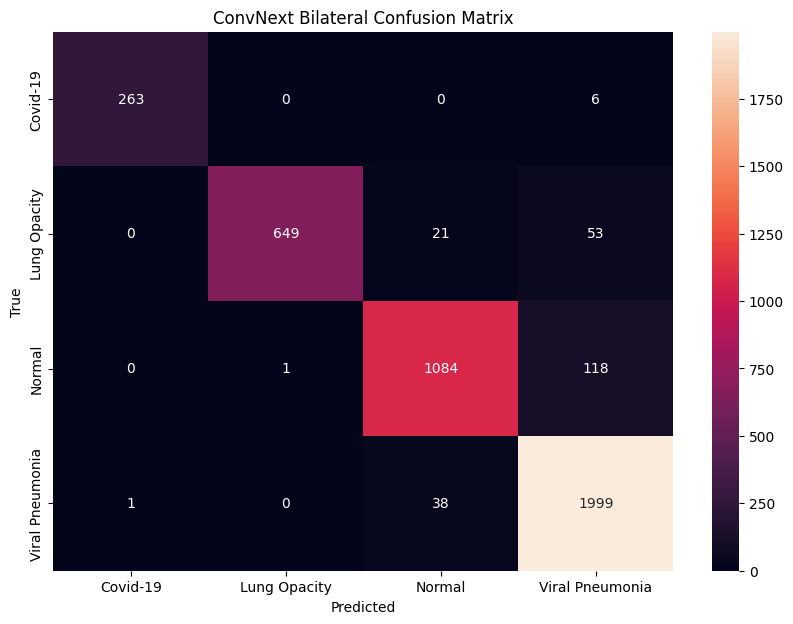

In [40]:
convnext_confusion_matrix_filter = pd.read_csv("convnext__bilateral_confusion_matrix.csv", index_col=0)
convnext_per_class_metrics_filter = pd.read_csv("convnext__bilateral_per_class_metrics.csv", index_col=0)
plot_confusion_matrix(convnext_confusion_matrix_filter, "ConvNext Bilateral Confusion Matrix")

In [41]:
convnext_per_class_metrics_filter

,Accuracy,Precision,Recall
Covid-19,0.977695,0.996212,0.977695
Lung Opacity,0.897649,0.998462,0.897649
Normal,0.901081,0.948381,0.901081
Viral Pneumonia,0.980864,0.918658,0.980864


### 1.2 Accuracy, Precision, Recall Per Class

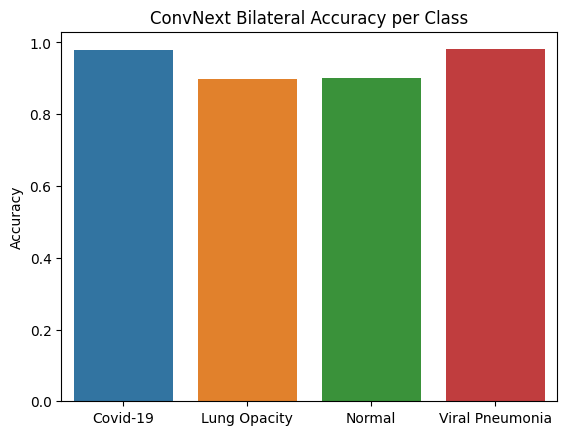

In [42]:
plot_per_class_metric(convnext_per_class_metrics_filter, "Accuracy", "ConvNext Bilateral Accuracy per Class")

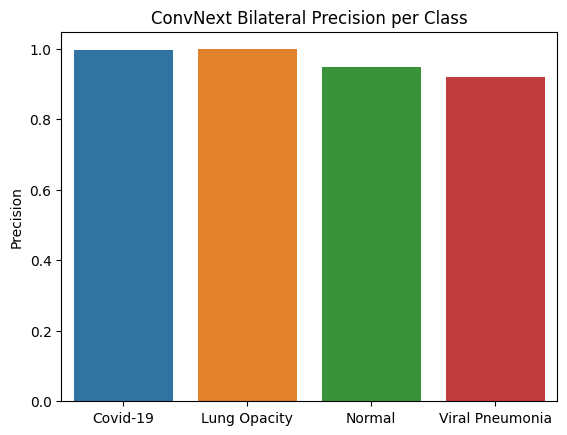

In [43]:
plot_per_class_metric(convnext_per_class_metrics_filter, "Precision", "ConvNext Bilateral Precision per Class")

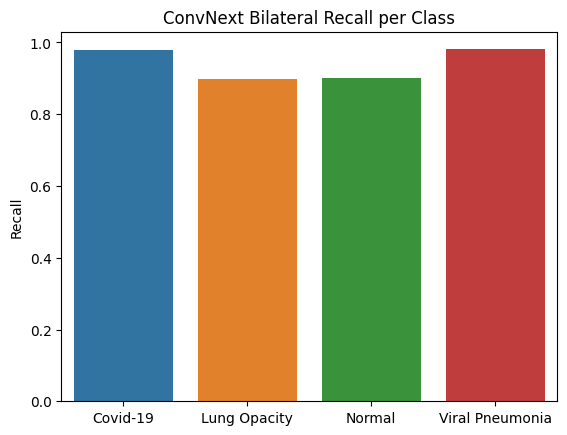

In [44]:
plot_per_class_metric(convnext_per_class_metrics_filter, "Recall", "ConvNext Bilateral Recall per Class")

# 2. ConvNext With no Filter

### 2.1 Confusion Matrix

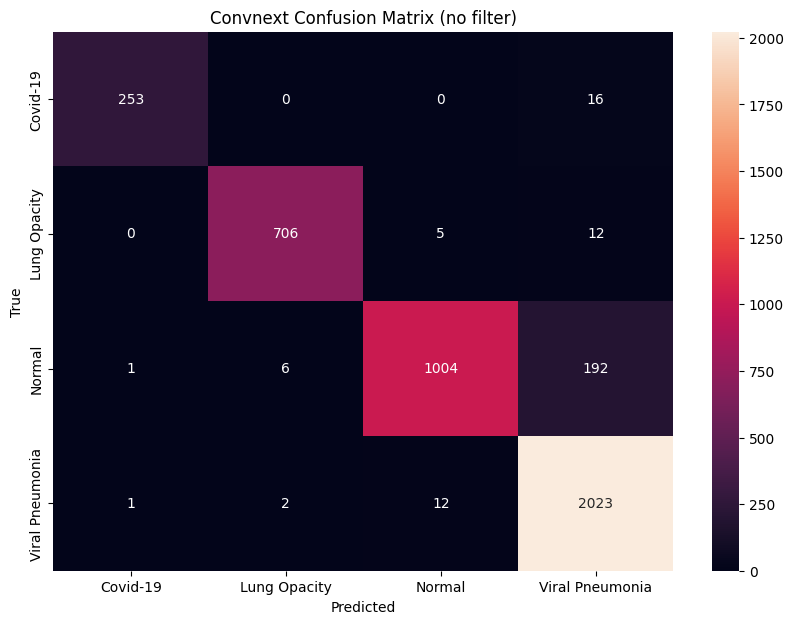

In [45]:
# Load the data
convnext_confusion_matrix_no_filter = pd.read_csv("convnext_confusion_matrix.csv", index_col=0)
convnext_per_class_metrics_no_filter = pd.read_csv("convnext_per_class_metrics.csv", index_col=0)

plot_confusion_matrix(data=convnext_confusion_matrix_no_filter, plot_title='Convnext Confusion Matrix (no filter)')

### 2.2 Accuracy, Precision and Recall Per Class

In [46]:
convnext_per_class_metrics_no_filter

,Accuracy,Precision,Recall
Covid-19,0.940520,0.992157,0.940520
Lung Opacity,0.976487,0.988796,0.976487
Normal,0.834580,0.983350,0.834580
Viral Pneumonia,0.992640,0.901917,0.992640


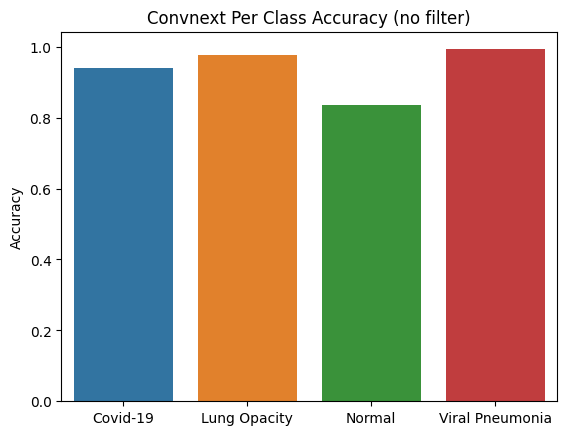

In [47]:
plot_per_class_metric(data=convnext_per_class_metrics_no_filter, metric_name='Accuracy', title="Convnext Per Class Accuracy (no filter)")

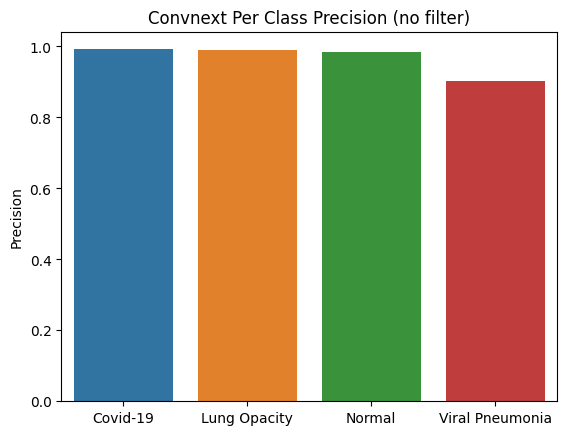

In [48]:
plot_per_class_metric(data=convnext_per_class_metrics_no_filter, metric_name='Precision', title="Convnext Per Class Precision (no filter)")

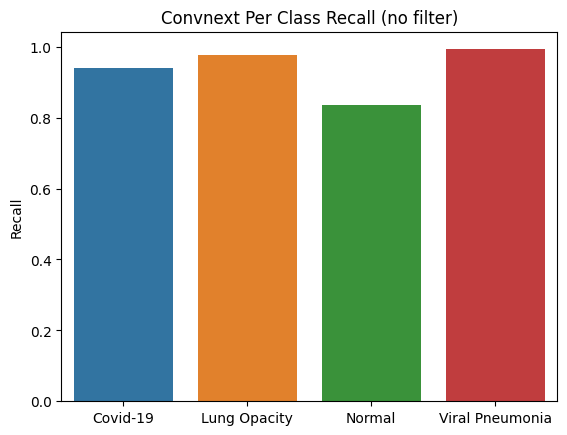

In [49]:
plot_per_class_metric(data=convnext_per_class_metrics_no_filter, metric_name='Recall', title="Convnext Per Class Recall (no filter)")

# 3. Multi-Layer Perceptron

## 3.1. Confusion Matrix

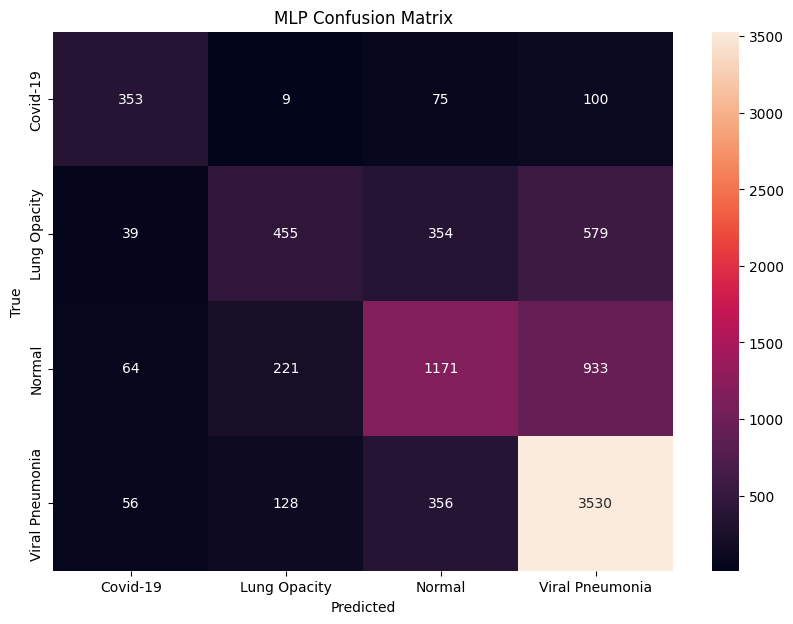

In [50]:
mlp_confusion_matrix = pd.read_csv("mlp_confusion_matrix.csv", index_col=0)
mlp_per_class_metrics = pd.read_csv("mlp_per_class_metrics.csv", index_col=0)
plot_confusion_matrix(mlp_confusion_matrix, "MLP Confusion Matrix")

## 3.2. Accuracy, Precision and Recall Per Class

In [51]:
mlp_per_class_metrics

,Accuracy,Precision,Recall
Covid-19,0.657356,0.689453,0.657356
Lung Opacity,0.318851,0.559656,0.318851
Normal,0.490163,0.598671,0.490163
Viral Pneumonia,0.867322,0.686503,0.867322


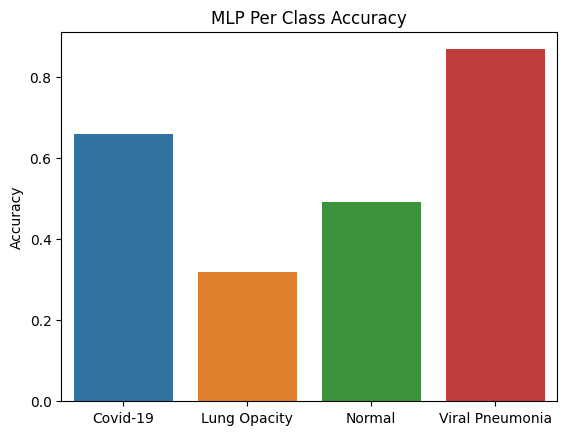

In [52]:
plot_per_class_metric(data=mlp_per_class_metrics, metric_name='Accuracy', title="MLP Per Class Accuracy")

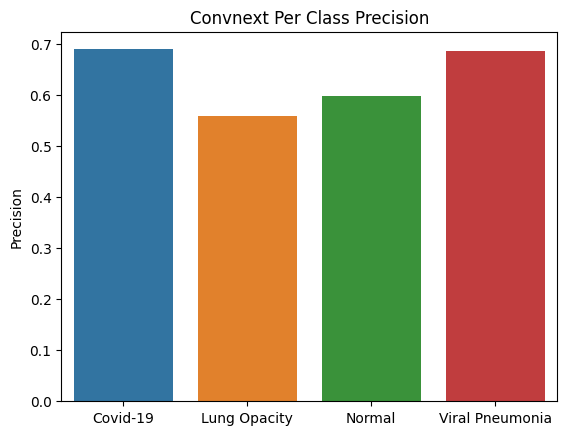

In [53]:
plot_per_class_metric(data=mlp_per_class_metrics, metric_name='Precision', title="Convnext Per Class Precision")

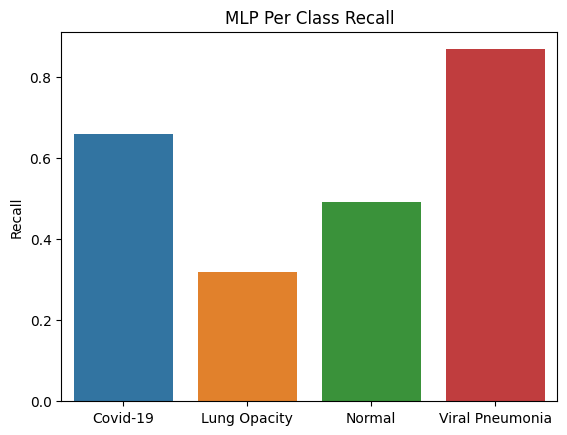

In [54]:
plot_per_class_metric(data=mlp_per_class_metrics, metric_name='Recall', title="MLP Per Class Recall")

# General analysis

In [55]:
convnext_metrics_filter = pd.read_csv("convnext__bilateral_metrics.csv")
mlp_metrics = pd.read_csv("mlp_metrics.csv")
convnext_metrics_no_filter = pd.read_csv("convnext_metrics.csv")

# Drop the loss column
convnext_metrics_filter = convnext_metrics_filter.drop(["test/loss", "test/BalancedAccuracy"], axis=1)
mlp_metrics = mlp_metrics.drop(["test/loss", "test/BalancedAccuracy"], axis=1)
convnext_metrics_no_filter = convnext_metrics_no_filter.drop(["test/loss", "test/BalancedAccuracy"], axis=1)

# Change column names
convnext_metrics_filter.columns = convnext_metrics_filter.columns.str.replace("test/", "")
mlp_metrics.columns = mlp_metrics.columns.str.replace("test/", "")
convnext_metrics_no_filter.columns = convnext_metrics_no_filter.columns.str.replace("test/", "")

# Place column names as a single column
convnext_metrics_filter = convnext_metrics_filter.melt(var_name='Metric', value_name='Convnext')
mlp_metrics = mlp_metrics.melt(var_name='Metric', value_name='Mlp')
convnext_metrics_no_filter = convnext_metrics_no_filter.melt(var_name='Metric', value_name='Covnext with filter')
"""
convnext_metrics_filter = convnext_metrics_filter.set_index("Metric")
convnext_metrics_filter.index.name = None
mlp_metrics = mlp_metrics.set_index("Metric")
mlp_metrics.index.name = None
convnext_metrics_no_filter = convnext_metrics_no_filter.set_index("Metric")
convnext_metrics_no_filter.index.name = None"""

'\nconvnext_metrics_filter = convnext_metrics_filter.set_index("Metric")\nconvnext_metrics_filter.index.name = None\nmlp_metrics = mlp_metrics.set_index("Metric")\nmlp_metrics.index.name = None\nconvnext_metrics_no_filter = convnext_metrics_no_filter.set_index("Metric")\nconvnext_metrics_no_filter.index.name = None'

In [57]:
general_metrics = get_general_metrics([convnext_metrics_filter, mlp_metrics, convnext_metrics_no_filter])
general_metrics

,Convnext,Mlp,Covnext with filter
Accuracy,0.943775,0.654042,0.941649
Precision,0.965428,0.633571,0.966555
Recall,0.939322,0.583423,0.936057


<Figure size 800x400 with 0 Axes>

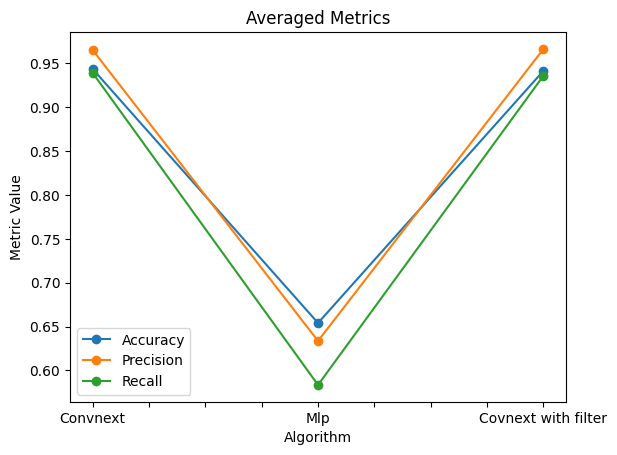

In [58]:
plot_general_metrics(general_metrics)